## Heart Failure Prediction Dataset from Data Analyst - Data Science Approach: Classification

**Project Overview:**
This project involves exploring the Heart Failure Prediction Dataset available on Kaggle to enhance my Data Science skills. The dataset was obtained from Kaggle and is used solely for educational and learning purposes. The goal of this project is to thoroughly analyze the dataset, apply various data science techniques, and showcase my findings and capabilities.

**Important Disclaimer:**
This project is intended for learning and educational purposes only. The analyses and models developed should not be used for predicting heart disease or making medical decisions. The results are for academic exploration and do not reflect the accuracy or reliability needed for medical diagnoses.

**Citation:**
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


# Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

# Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations
* Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/



## 1. Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset localy
path = '../data/' #select your path
archive_name = 'heart.csv'
df = pd.read_csv(path + archive_name)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Load the dataset from drive

#df = pd.read_csv('/content/heart.csv')
#df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# Missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df[df.duplicated()]
#df.drop_duplicates(inplace=True)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## Exploratory Data Analysis (EDA)

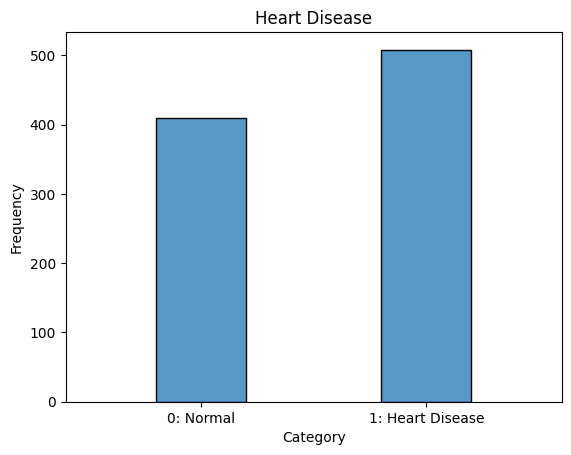

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
ax = sns.histplot(df['HeartDisease'], bins=2, kde=False, discrete=True)

# Adjust the width of the bars and center them on the ticks
for patch in ax.patches:
    patch.set_width(0.4)  # Set the width of each bar
    patch.set_x(patch.get_x() + 0.3)  # Center the bar on the tick

# Add title and axis labels
plt.title('Heart Disease')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Set the x-axis ticks and labels
plt.xticks(ticks=[0, 1], labels=['0: Normal', '1: Heart Disease'])

# Display the plot
plt.show()



/tmp/ipykernel_33498/1151971240.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, figsize=(10, 10), ax=ax, diagonal='hist') # change diagonal='hist' or 'kde'


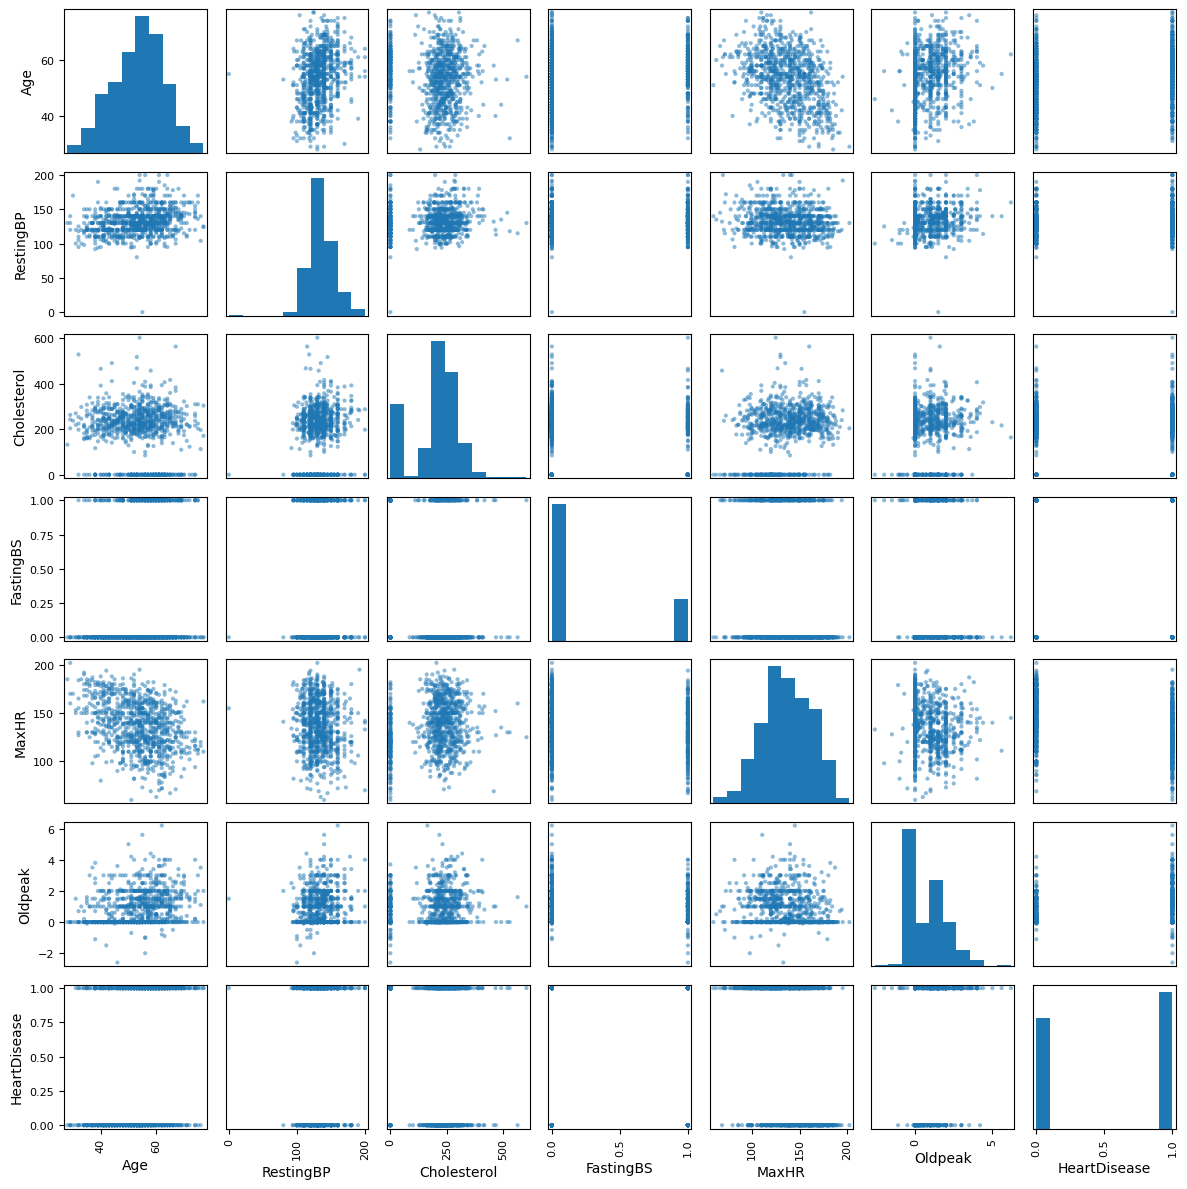

In [8]:

# ploting scatter matriz
from pandas.plotting import scatter_matrix

# Create the scatter matrix
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(df, figsize=(10, 10), ax=ax, diagonal='hist') # change diagonal='hist' or 'kde'

# Rotate labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
for label in ax.get_yticklabels():
    label.set_rotation(45)

# Adjust layout
plt.tight_layout()
plt.show()


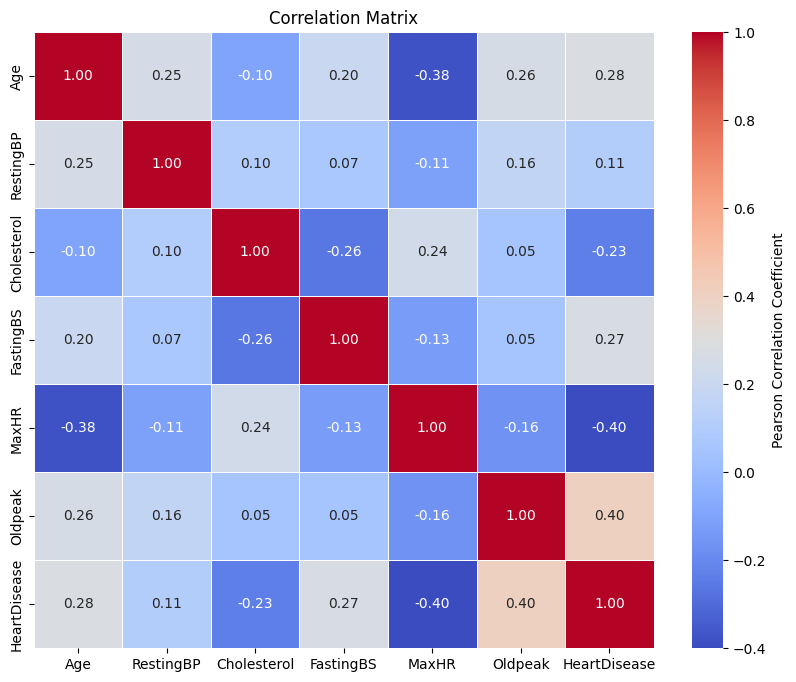

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure DataFrame contains only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and colorbar label
plt.title('Correlation Matrix')
colorbar = ax.collections[0].colorbar
colorbar.set_label('Pearson Correlation Coefficient')

# Show the plot
plt.show()



In [10]:
corr_df = corr_matrix.HeartDisease.sort_values()
corr_df

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Non numeric variables

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform Chi-Square Test for each categorical variable with HeartDisease
results = {}
for column in categorical_columns:
    if column != 'HeartDisease':  # Skip HeartDisease itself
        contingency_table = pd.crosstab(df['HeartDisease'], df[column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[column] = {'Chi2 Statistic': chi2, 'p-value': p}

# Display results
for var, result in results.items():
    print(f"Variable: {var}")
    print(f"Chi2 Statistic: {result['Chi2 Statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    print()

Variable: Sex
Chi2 Statistic: 84.1451
p-value: 0.0000

Variable: ChestPainType
Chi2 Statistic: 268.0672
p-value: 0.0000

Variable: RestingECG
Chi2 Statistic: 10.9315
p-value: 0.0042

Variable: ExerciseAngina
Chi2 Statistic: 222.2594
p-value: 0.0000

Variable: ST_Slope
Chi2 Statistic: 355.9184
p-value: 0.0000



# Both categorical and non-categorical variables appear to be correlated with the target variable Heart Disease


## Missing Data codificated as cero


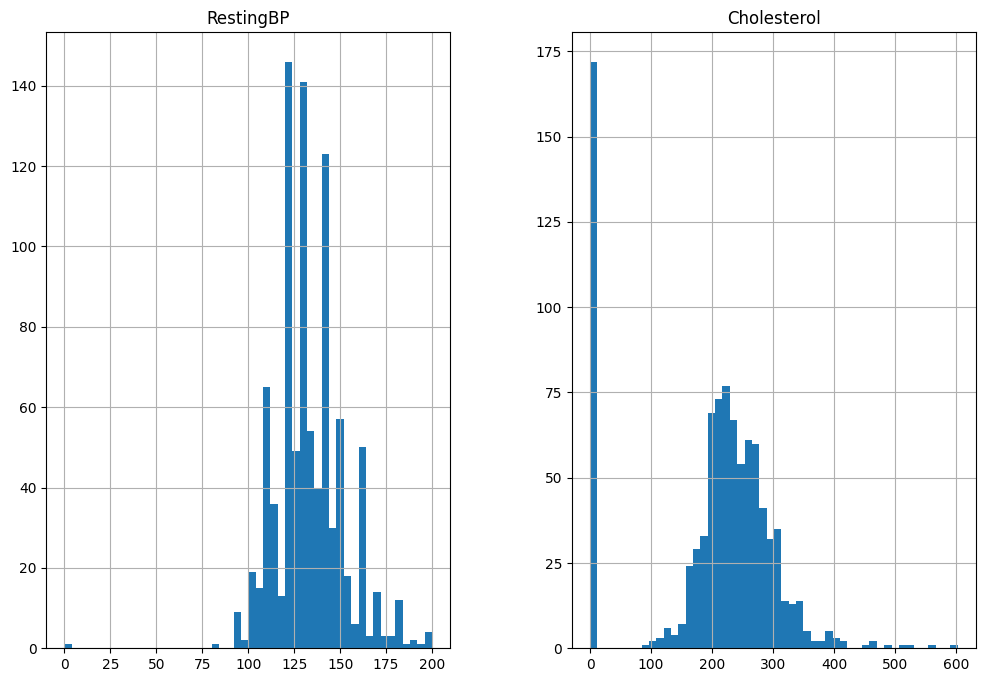

In [12]:
# 'RestingBP', 'Cholesterol' histograms
df[['RestingBP', 'Cholesterol']].hist(bins=50, figsize=(12, 8))
plt.show()

In [13]:
# Clean the DataFrame by removing rows where 'Cholesterol' or 'RestingBP' are zero
df_cleaned = df[(df['Cholesterol'] != 0) & (df['RestingBP'] != 0)]

#mean_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].mean()
#df['Cholesterol'] = df['Cholesterol'].replace(0, mean_cholesterol)
#mean_resting_bp = df[df['RestingBP'] != 0]['RestingBP'].mean()
#df['RestingBP'] = df['RestingBP'].replace(0, mean_resting_bp)

/tmp/ipykernel_33498/2403390139.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_cleaned, figsize=(10, 10), ax=ax, diagonal='hist') # change diagonal='hist' or 'kde'


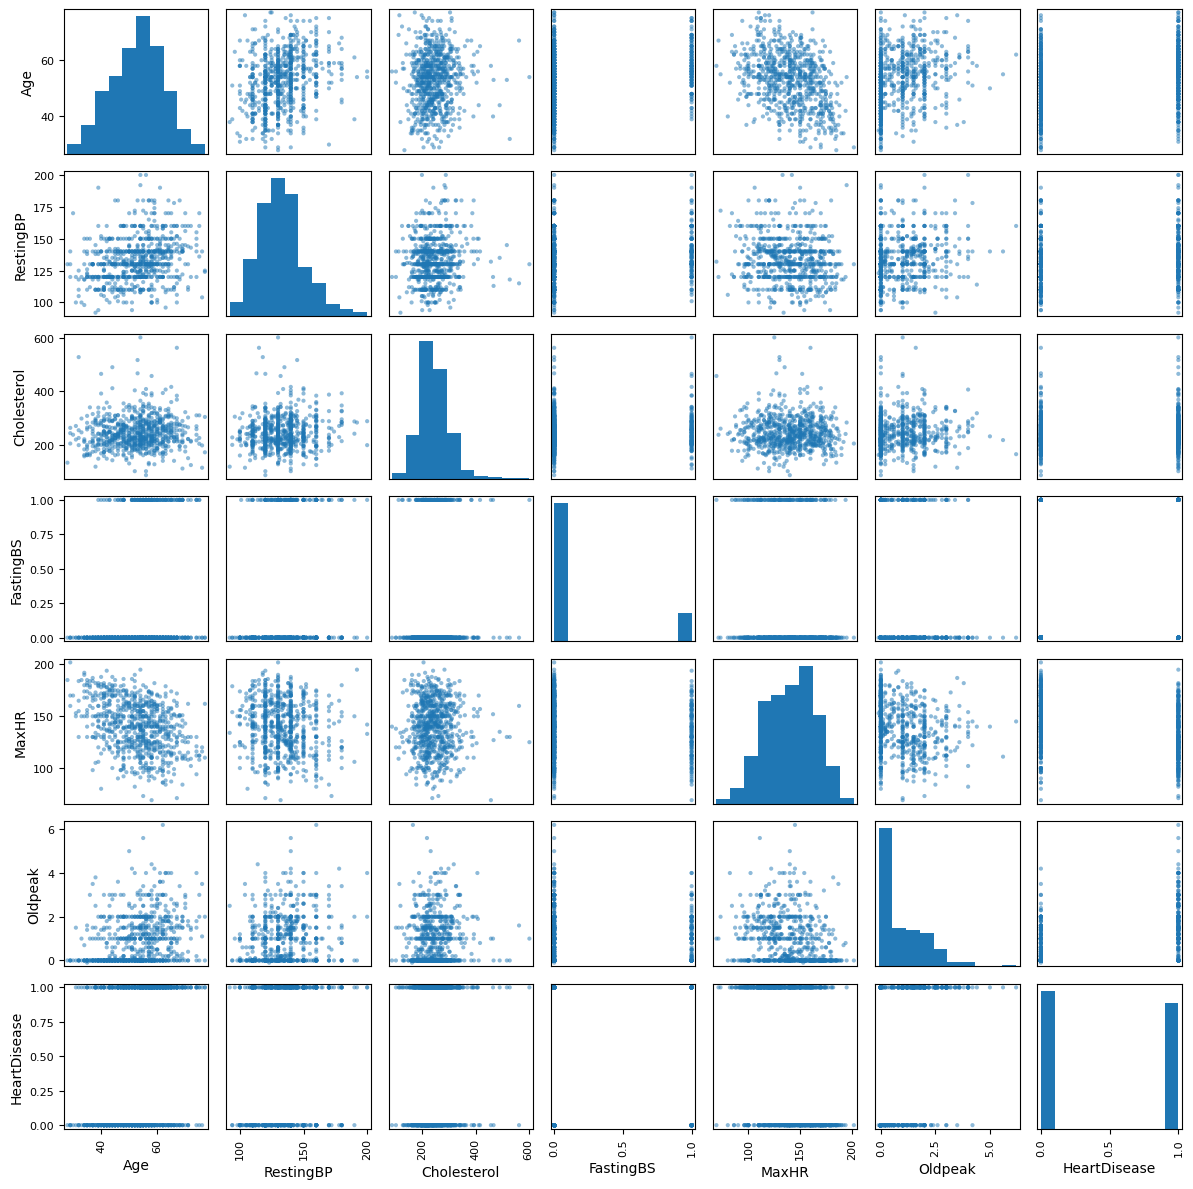

In [14]:

# ploting scatter matriz
from pandas.plotting import scatter_matrix

# Create the scatter matrix
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(df_cleaned, figsize=(10, 10), ax=ax, diagonal='hist') # change diagonal='hist' or 'kde'

# Rotate labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
for label in ax.get_yticklabels():
    label.set_rotation(45)

# Adjust layout
plt.tight_layout()
plt.show()

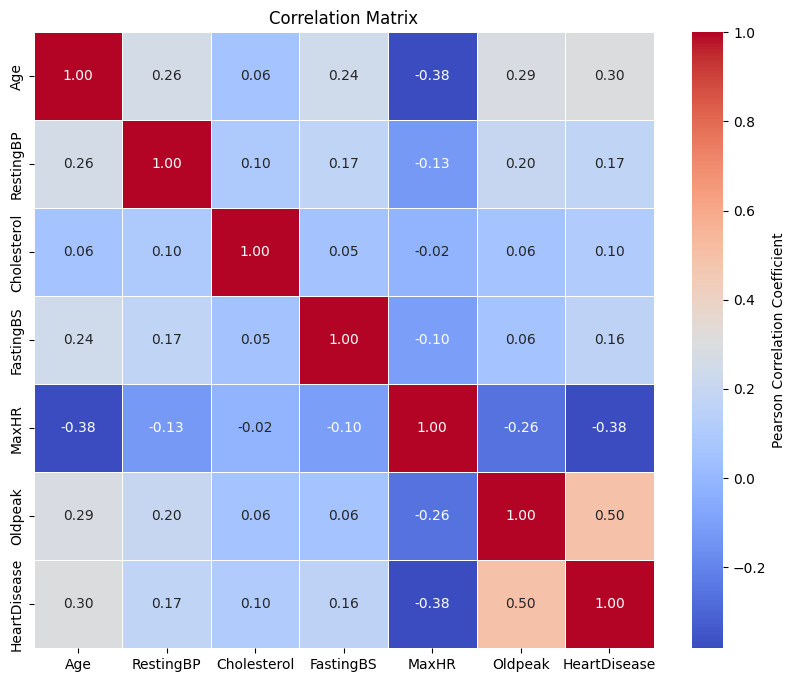

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure DataFrame contains only numeric columns
numeric_df_cleaned = df_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix_cleaned = numeric_df_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and colorbar label
plt.title('Correlation Matrix')
colorbar = ax.collections[0].colorbar
colorbar.set_label('Pearson Correlation Coefficient')

# Show the plot
plt.show()



In [16]:
corr_df_cleaned = corr_matrix_cleaned.HeartDisease.sort_values()
corr_df_cleaned

MaxHR          -0.377212
Cholesterol     0.103866
FastingBS       0.160594
RestingBP       0.173242
Age             0.298617
Oldpeak         0.495696
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [17]:
# Non numeric variables

# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Perform Chi-Square Test for each categorical variable with HeartDisease
results = {}
for column in categorical_columns:
    if column != 'HeartDisease':  # Skip HeartDisease itself
        contingency_table = pd.crosstab(df_cleaned['HeartDisease'], df_cleaned[column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results[column] = {'Chi2 Statistic': chi2, 'p-value': p}

# Display results
for var, result in results.items():
    print(f"Variable: {var}")
    print(f"Chi2 Statistic: {result['Chi2 Statistic']:.4f}")
    print(f"p-value: {result['p-value']:.4f}")
    print()

Variable: Sex
Chi2 Statistic: 62.5891
p-value: 0.0000

Variable: ChestPainType
Chi2 Statistic: 215.1904
p-value: 0.0000

Variable: RestingECG
Chi2 Statistic: 13.8196
p-value: 0.0010

Variable: ExerciseAngina
Chi2 Statistic: 224.9078
p-value: 0.0000

Variable: ST_Slope
Chi2 Statistic: 319.1376
p-value: 0.0000



In [18]:
# Combine the sorted correlation values into a new DataFrame
comparison_df = pd.DataFrame({
    'Original': corr_df,
    'Cleaned': corr_df_cleaned
})

print(comparison_df)

              Original   Cleaned
Age           0.282039  0.298617
Cholesterol  -0.232741  0.103866
FastingBS     0.267291  0.160594
HeartDisease  1.000000  1.000000
MaxHR        -0.400421 -0.377212
Oldpeak       0.403951  0.495696
RestingBP     0.107589  0.173242


## Data visualization

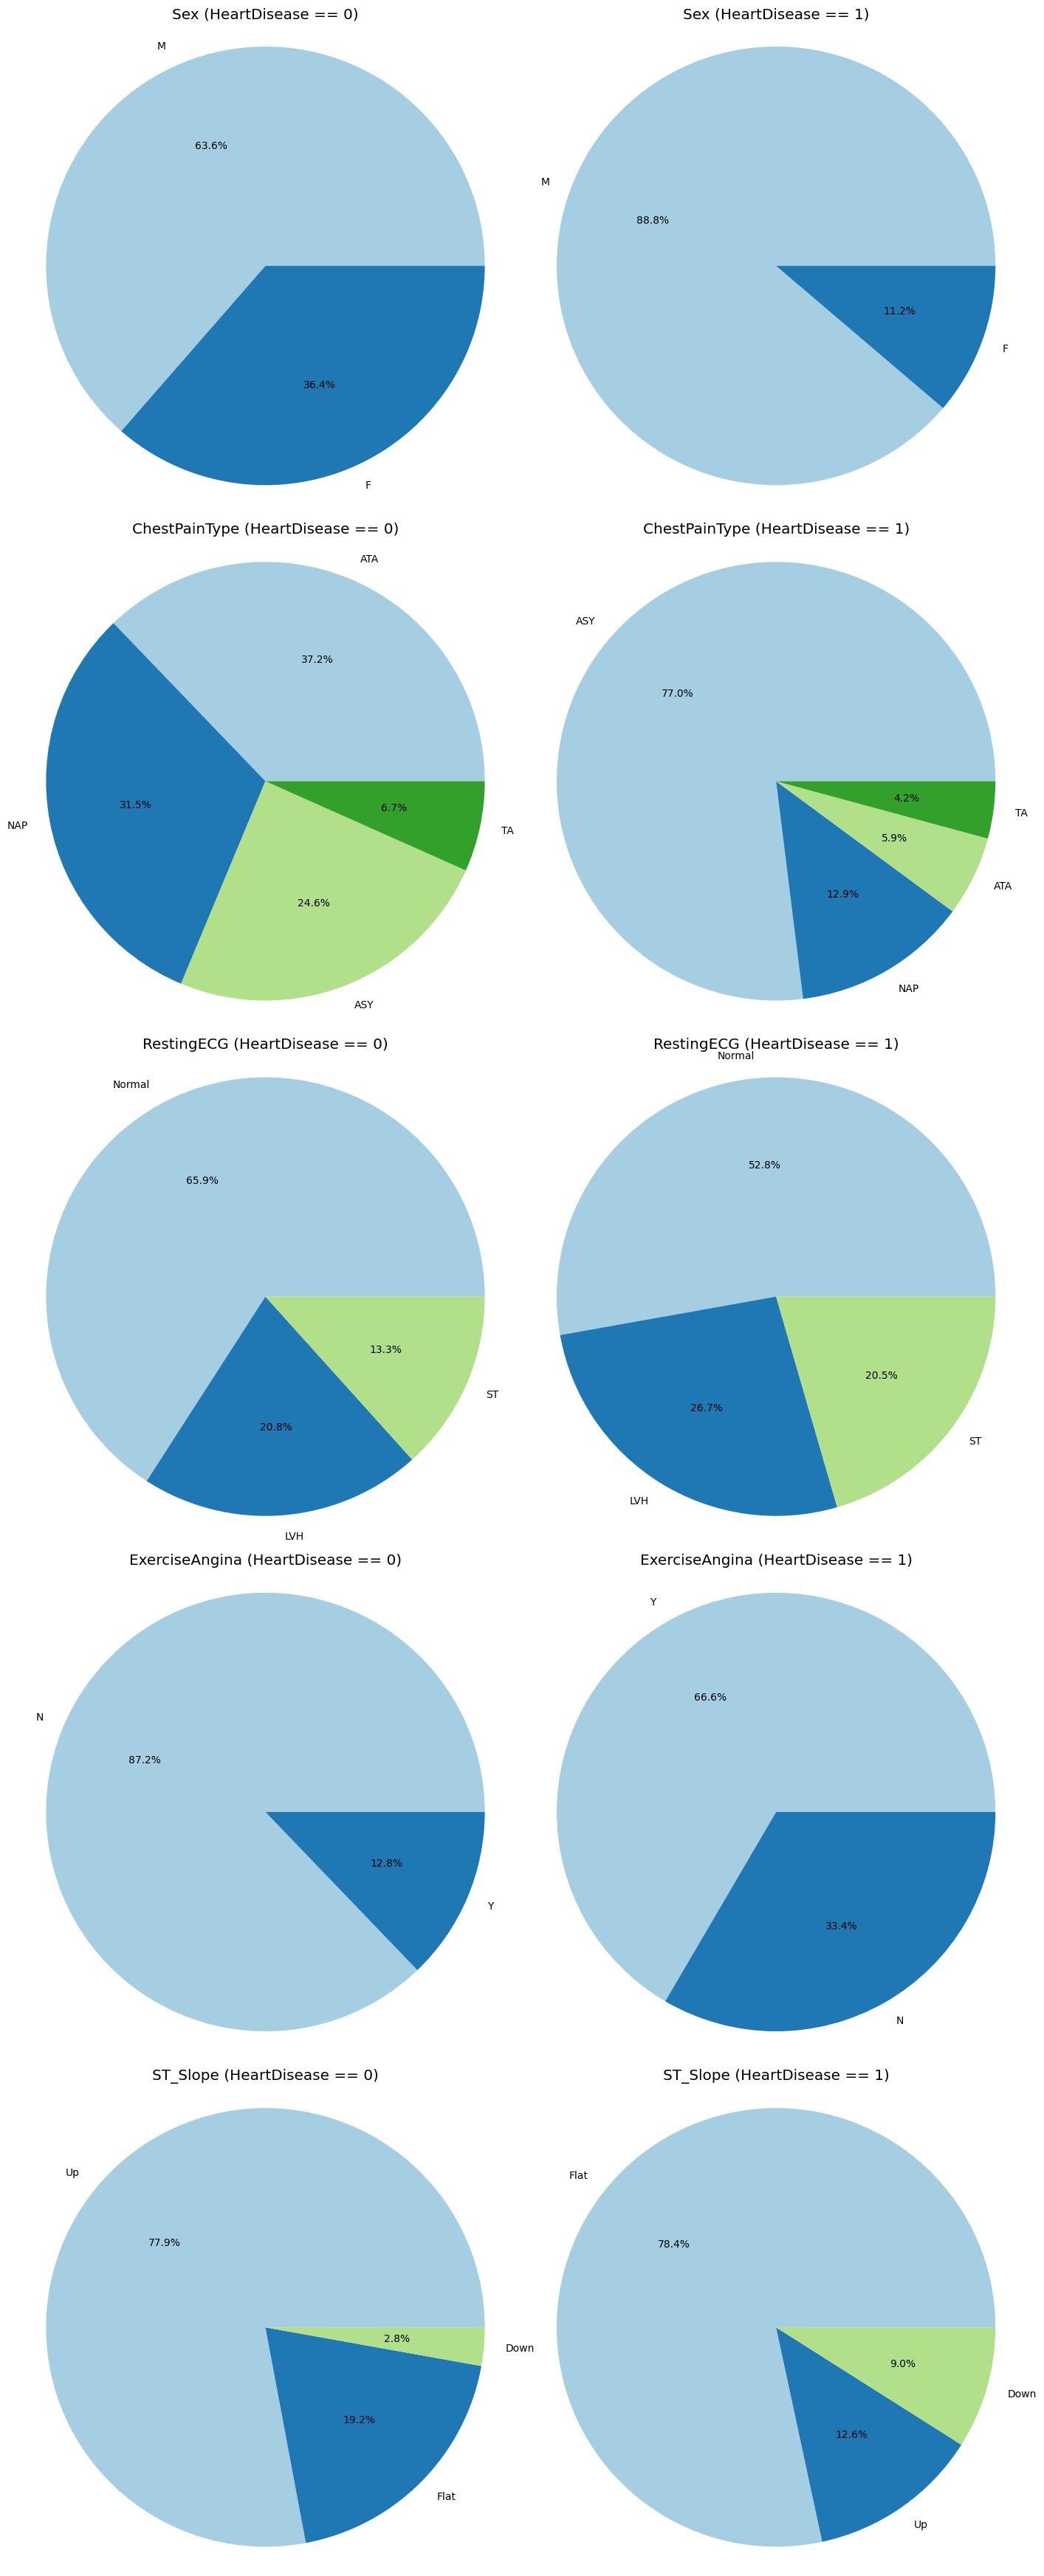

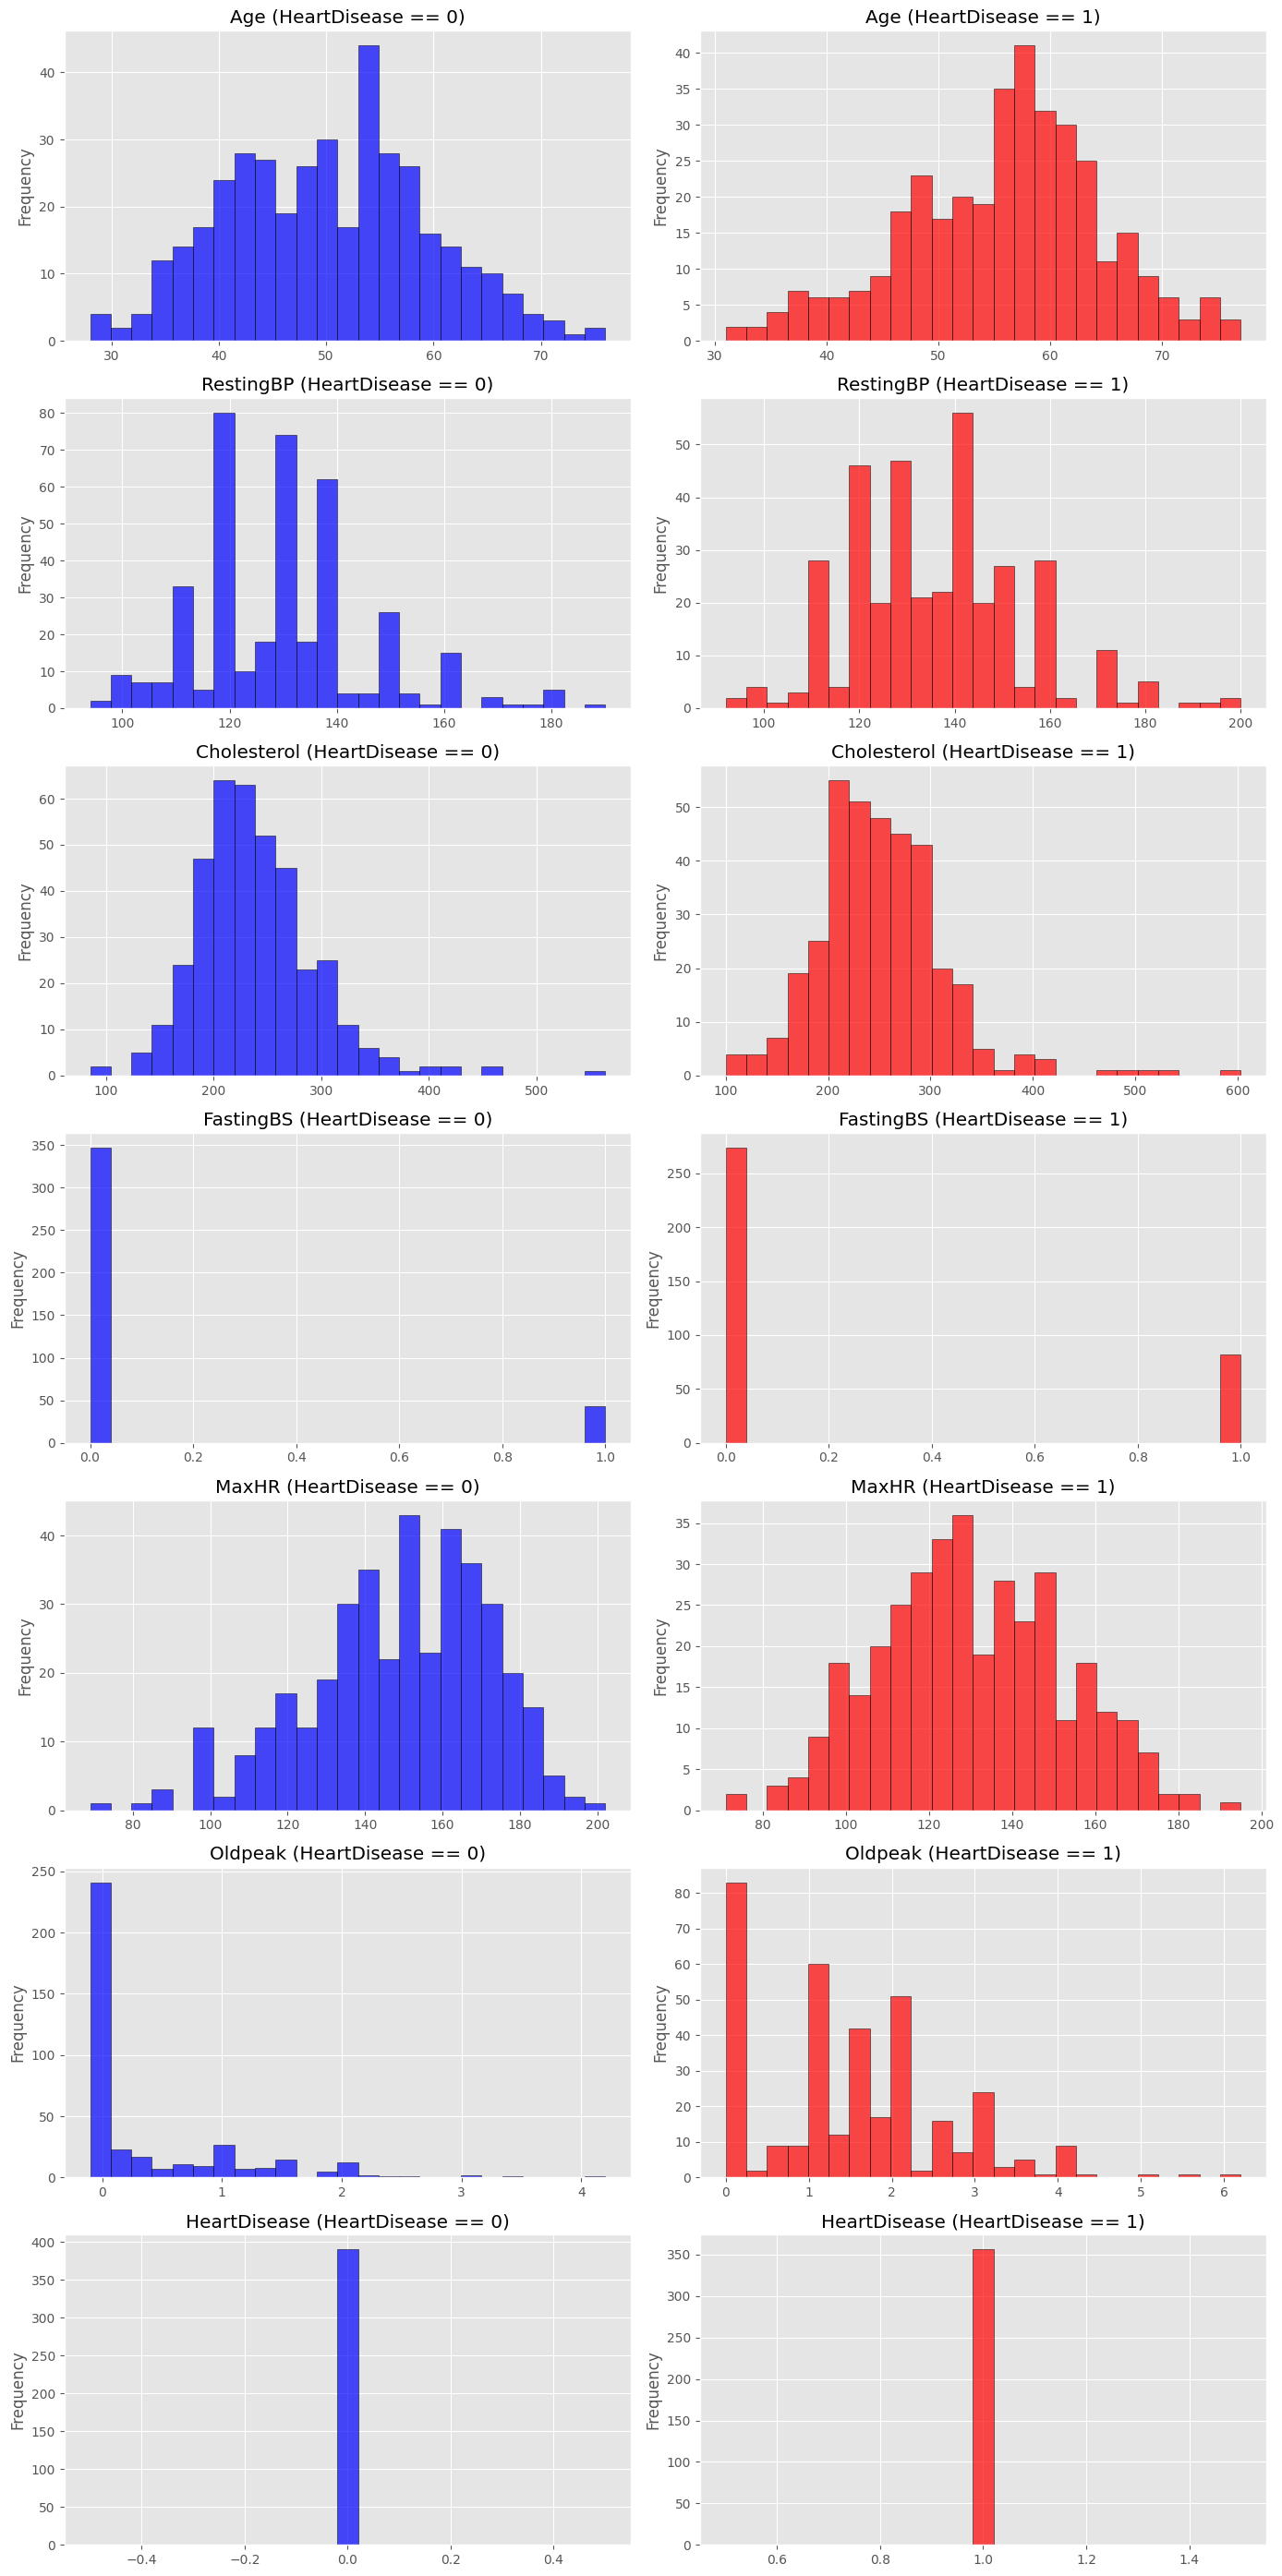

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette for consistency
plt.style.use('ggplot')  # Change to a valid style available in your installation
colors = plt.cm.Paired(range(10))  # Define a color palette for pie charts
hist_colors = ['blue', 'red']  # Colors for histograms

# Split the data into two subsets
df_heart_0 = df_cleaned[df_cleaned['HeartDisease'] == 0]
df_heart_1 = df_cleaned[df_cleaned['HeartDisease'] == 1]

# Get the categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Create a figure with subplots for categorical variables
n_cols_cat = 2
n_rows_cat = len(categorical_columns)
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(14, n_rows_cat * 7))

# Iterate over each categorical variable
for i, col in enumerate(categorical_columns):
    # Pie chart for HeartDisease == 0
    counts_heart_0 = df_heart_0[col].value_counts()
    axes_cat[i, 0].pie(counts_heart_0, labels=counts_heart_0.index, autopct='%1.1f%%', colors=colors[:len(counts_heart_0)])
    axes_cat[i, 0].set_title(f'{col} (HeartDisease == 0)')
    axes_cat[i, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Pie chart for HeartDisease == 1
    counts_heart_1 = df_heart_1[col].value_counts()
    axes_cat[i, 1].pie(counts_heart_1, labels=counts_heart_1.index, autopct='%1.1f%%', colors=colors[:len(counts_heart_1)])
    axes_cat[i, 1].set_title(f'{col} (HeartDisease == 1)')
    axes_cat[i, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

# Get the numeric variables
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Create a figure with subplots for numeric variables
n_cols_num = 2
n_rows_num = len(numeric_columns)
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(14, n_rows_num * 4))

# Iterate over each numeric variable
for i, col in enumerate(numeric_columns):
    # Histogram for HeartDisease == 0
    axes_num[i, 0].hist(df_heart_0[col], bins=25, color=hist_colors[0], alpha=0.7, edgecolor='black')
    axes_num[i, 0].set_title(f'{col} (HeartDisease == 0)')
    axes_num[i, 0].set_ylabel('Frequency')

    # Histogram for HeartDisease == 1
    axes_num[i, 1].hist(df_heart_1[col], bins=25, color=hist_colors[1], alpha=0.7, edgecolor='black')
    axes_num[i, 1].set_title(f'{col} (HeartDisease == 1)')
    axes_num[i, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()



In [25]:
import pandas as pd

# Filter only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate means and standard deviations for numeric variables
numeric_stats = pd.DataFrame({
    'Mean (HeartDisease == 0)': df_cleaned[df_cleaned['HeartDisease'] == 0][numeric_columns].mean(),
    'Std Dev (HeartDisease == 0)': df_cleaned[df_cleaned['HeartDisease'] == 0][numeric_columns].std(),
    'Mean (HeartDisease == 1)': df_cleaned[df_cleaned['HeartDisease'] == 1][numeric_columns].mean(),
    'Std Dev (HeartDisease == 1)': df_cleaned[df_cleaned['HeartDisease'] == 1][numeric_columns].std()
})

# Display the table of means and standard deviations
print("Numeric Variables Statistics:")
print(numeric_stats)



Numeric Variables Statistics:
              Mean (HeartDisease == 0)  Std Dev (HeartDisease == 0)  \
Age                          50.171795                     9.307029   
RestingBP                   130.164103                    16.137065   
Cholesterol                 238.769231                    55.394617   
FastingBS                     0.110256                     0.313611   
MaxHR                       149.058974                    23.111646   
Oldpeak                       0.393846                     0.677674   
HeartDisease                  0.000000                     0.000000   

              Mean (HeartDisease == 1)  Std Dev (HeartDisease == 1)  
Age                          55.851124                     8.820768  
RestingBP                   136.154494                    17.963226  
Cholesterol                 251.061798                    62.462713  
FastingBS                     0.230337                     0.421641  
MaxHR                       130.550562             

In [27]:
import pandas as pd

# Filtrar solo columnas categóricas
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Crear un diccionario para almacenar tablas de porcentajes
categorical_tables = {}

for col in categorical_columns:
    # Porcentaje de cada categoría para HeartDisease == 0
    percentages_heart_0 = df_cleaned[df_cleaned['HeartDisease'] == 0][col].value_counts(normalize=True) * 100

    # Porcentaje de cada categoría para HeartDisease == 1
    percentages_heart_1 = df_cleaned[df_cleaned['HeartDisease'] == 1][col].value_counts(normalize=True) * 100

    # Crear un DataFrame con los porcentajes
    stats = pd.DataFrame({
        'Percentage (HeartDisease == 0)': percentages_heart_0,
        'Percentage (HeartDisease == 1)': percentages_heart_1
    })

    # Asegurarse de que las categorías están en ambas tablas
    stats = stats.fillna(0)

    # Almacenar el DataFrame en el diccionario
    categorical_tables[col] = stats

# Mostrar las tablas
for col, table in categorical_tables.items():
    print(f"\nTable for {col}:")
    print(table)



Table for Sex:
     Percentage (HeartDisease == 0)  Percentage (HeartDisease == 1)
Sex                                                                
M                         63.589744                       88.764045
F                         36.410256                       11.235955

Table for ChestPainType:
               Percentage (HeartDisease == 0)  Percentage (HeartDisease == 1)
ChestPainType                                                                
ASY                                 24.615385                       76.966292
ATA                                 37.179487                        5.898876
NAP                                 31.538462                       12.921348
TA                                   6.666667                        4.213483

Table for RestingECG:
            Percentage (HeartDisease == 0)  Percentage (HeartDisease == 1)
RestingECG                                                                
Normal                           65.897436   

## Pre-proccesing - Categorical variables tranformation

In [28]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Variable: {column}")
    print(df[column].value_counts())
    print()


Variable: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Variable: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Variable: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Variable: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Variable: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



In [29]:
df_encoded = pd.get_dummies(df_cleaned, drop_first=True).astype(int)


In [30]:
print("Original DataFrame:")
print(df_cleaned.head(3))

print("\nOne-Hot Encoded DataFrame:")
print(df_encoded.head(3))

Original DataFrame:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  

One-Hot Encoded DataFrame:
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172        0             0   
1   49        160          180          0    156        1             1   
2   37        130          283          0     98        0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0        

## Features and target variables separation

In [31]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [32]:
# Features and target variables separation
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

print(X.shape)
print(y.shape)
X.head()

(746, 15)
(746,)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,1,0,1,0,1,0,0,0,1


## Dimensionality reduction

## Perform PCA - Standardize the dataset, perform PCA, and determine the number of principal components needed to preserve the specified fraction of the variance.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca(df, variance_fraction=0.95):
    """
    Standardize the dataset, perform PCA, and determine the number of principal components
    needed to preserve the specified fraction of the variance.

    Parameters:
    df (pd.DataFrame): The DataFrame to be processed.
    variance_fraction (float): The fraction of variance to preserve (default is 0.95).

    Returns:
    int: Number of principal components required to preserve the specified fraction of variance.
    """
    # Standardize the dataset
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # Perform PCA without specifying the number of components
    pca = PCA()
    pca.fit(df_scaled)

    # Calculate cumulative sum of explained variance ratios
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    # Determine the number of components to preserve the specified fraction of variance
    num_components = np.argmax(cumsum >= variance_fraction) + 1

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 5))
    plt.plot(cumsum, linewidth=3, label='Cumulative Explained Variance')
    plt.axvline(num_components - 1, color="k", linestyle=":", label=f'{num_components} Components')
    plt.axhline(variance_fraction, color="k", linestyle=":", label=f'{variance_fraction*100:.0f}% Variance')
    plt.plot(num_components - 1, cumsum[num_components - 1], "ko", label='Threshold Point')

    plt.xlabel("Principal Components", fontsize=16)
    plt.ylabel("Explained Variance", fontsize=16)
    plt.title("Explained Variance vs. Number of Principal Components")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    print(f'With {num_components} components, we preserve {variance_fraction*100:.2f}% of the variance.')

    return num_components



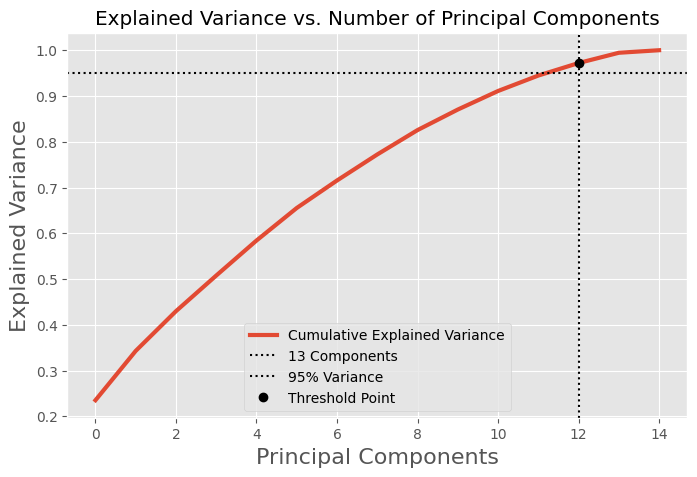

With 13 components, we preserve 95.00% of the variance.


In [34]:
# Call perform PCA with df_cleaned
num_components = perform_pca(X)

In [35]:
y.unique()

array([0, 1])

In [36]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA without specifying the number of components
pca = PCA()
pca.fit(X_scaled)

pca_2d = PCA(n_components=2)
df_total_pca_2d = pca_2d.fit_transform(X_scaled)


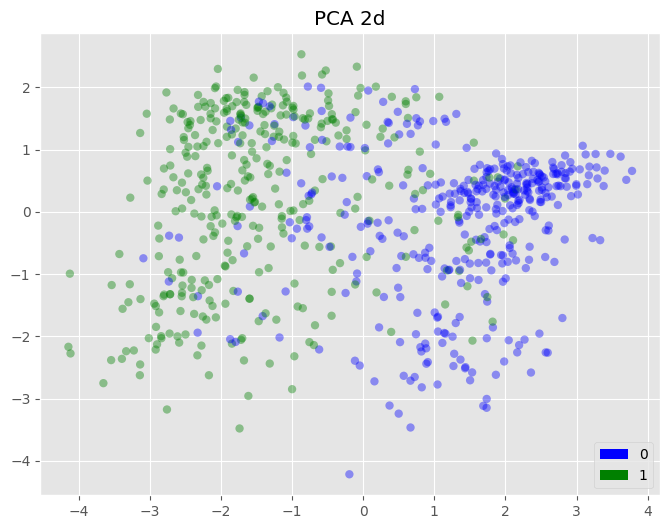

In [37]:
# Define the following colors
colors = {
    0: 'blue',
    1: 'green',
}

# Scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*df_total_pca_2d.T, c=y.map(colors),
                  edgecolors='None', alpha=0.4)
plt.title('PCA 2d')

# Create a small manual legend for the colors
import matplotlib.patches as mpatches

leyenda = []
clase = []
for q, color in colors.items():
    clase.append(q)
    leyenda.append(mpatches.Rectangle((0,0),1,1,fc=color))
plt.legend(leyenda, clase, loc=4)

In [38]:
len(X.columns)

15

## 5. Featuring engeniering

One hot encoding

## 6.   Model Building

    *   Split the data into training and test sets.
    *   Select and train different models.
    *   Evaluate the models using appropriate metrics.

Split the data into training and test sets.





In [39]:
# splip df_reduced in test and trainning sets
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Define, Train Models, and Plot ROC Curves

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Define machine learning models and hyperparameters for GridSearchCV
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [0.1, 1, 10],
            'logisticregression__solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [50, 100, 200],
            'randomforestclassifier__max_depth': [None, 10, 20, 30],
            'randomforestclassifier__min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'svc__C': [0.1, 1, 10],
            'svc__kernel': ['linear', 'rbf'],
            'svc__gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [3, 5, 7],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [None, 10, 20],
            'decisiontreeclassifier__min_samples_split': [2, 5, 10]
        }
    }
}

# Initialize results dictionary
results = {}

# Train and evaluate models with GridSearchCV and Cross-Validation
for model_name, config in models.items():
    print(f"Training {model_name} with hyperparameter tuning...")

    # Create a pipeline with StandardScaler and the model
    pipeline = make_pipeline(StandardScaler(), config['model'])

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Cross-Validation score
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')

    # Predictions and probabilities
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Store the results including the trained model
    results[model_name] = {
        'Model': best_model,
        'Best Parameters': grid_search.best_params_,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_prob),
        'Cross-Validation ROC AUC Score': np.mean(cv_scores),
        'ROC Curve': (fpr, tpr)
    }

    # Print results
    print(f"\n{model_name} Results:")
    print("Best Parameters:", results[model_name]['Best Parameters'])
    print("Confusion Matrix:\n", results[model_name]['Confusion Matrix'])
    print("\nClassification Report:\n", results[model_name]['Classification Report'])
    print(f"ROC AUC Score: {results[model_name]['ROC AUC Score']:.4f}")
    print(f"Cross-Validation ROC AUC Score: {results[model_name]['Cross-Validation ROC AUC Score']:.4f}\n")

    # Check if the model has feature importances
    if model_name in ['Random Forest', 'Decision Tree']:
        # Feature importances for Random Forest and Decision Tree
        model = best_model.named_steps['randomforestclassifier'] if model_name == 'Random Forest' else best_model.named_steps['decisiontreeclassifier']
        feature_importances = model.feature_importances_

        # Create a DataFrame for feature importances
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)

        print(f"Feature Importances for {model_name}:")
        print(importance_df)
    elif model_name == 'Logistic Regression':
        # Coefficients for Logistic Regression
        coefficients = best_model.named_steps['logisticregression'].coef_[0]
        coefficient_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': coefficients
        }).sort_values(by='Coefficient', ascending=False)

        print("Coefficients for Logistic Regression:")
        print(coefficient_df)


Training Logistic Regression with hyperparameter tuning...

Logistic Regression Results:
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Confusion Matrix:
 [[87 10]
 [12 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        97
           1       0.89      0.87      0.88        90

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187

ROC AUC Score: 0.9514
Cross-Validation ROC AUC Score: 0.9192

Coefficients for Logistic Regression:
              Feature  Coefficient
6               Sex_M     0.532341
13      ST_Slope_Flat     0.527233
12   ExerciseAngina_Y     0.415196
5             Oldpeak     0.349071
0                 Age     0.273352
1           RestingBP     0.218159
3           FastingBS     0.031556
2         Cholesterol     0.009689
4              

## Plot ROC Curves and Additional Visualizations

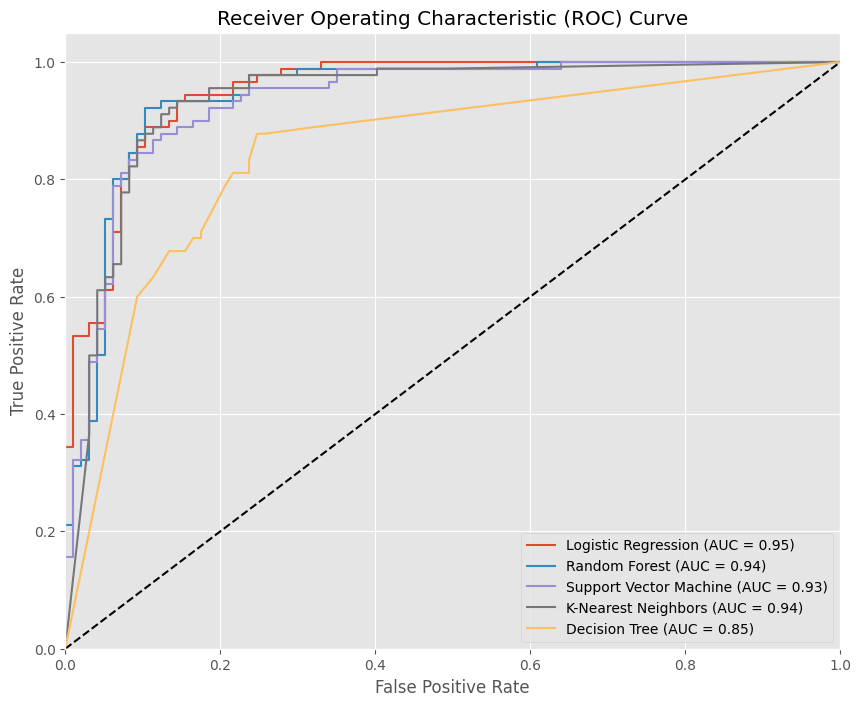

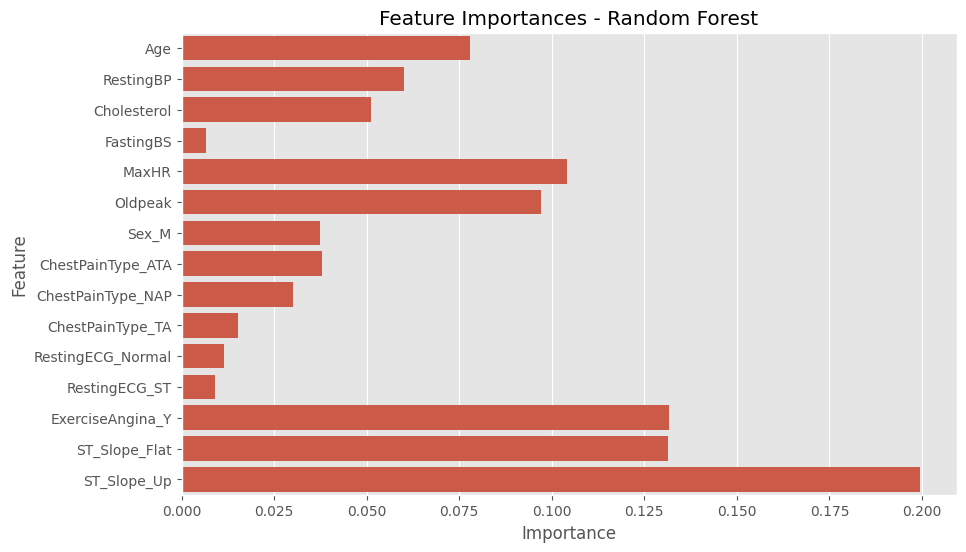

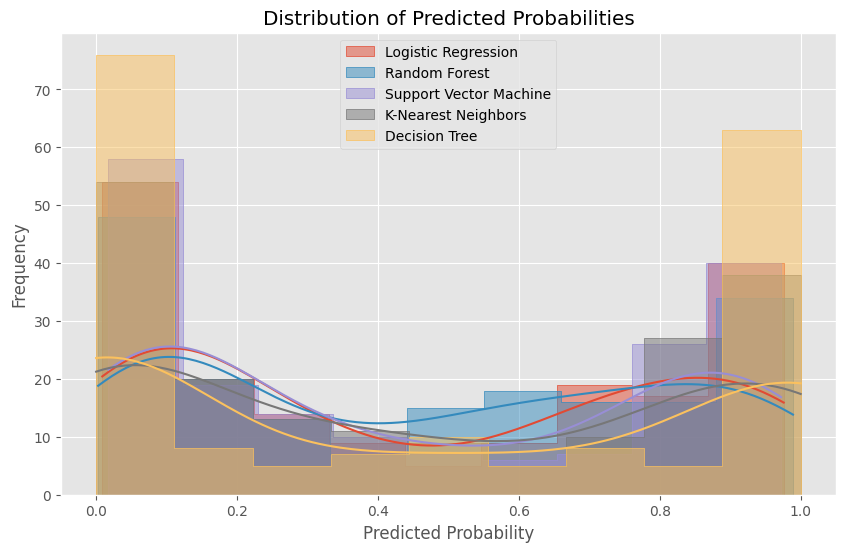

In [41]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr = result['ROC Curve']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["ROC AUC Score"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Additional Visualizations
# Feature importance for Random Forest
if 'Random Forest' in results:
    rf_model = results['Random Forest']['Model']

    # Extract the Random Forest model from the pipeline
    if hasattr(rf_model.named_steps['randomforestclassifier'], 'feature_importances_'):
        feature_importances = rf_model.named_steps['randomforestclassifier'].feature_importances_
        feature_names = X.columns

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_names)
        plt.title('Feature Importances - Random Forest')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

# Distribution of Predicted Probabilities
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    best_model = result['Model']

    # Predict probabilities
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Plot distribution of predicted probabilities
    sns.histplot(y_prob, kde=True, label=model_name, element='step')

plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Evaluation

# ROC AUC Score:

The model with the highest ROC AUC score is the one that best distinguishes between classes. In this case, Logistic Regression has the highest ROC AUC score (0.9514) and also a good Cross-Validation ROC AUC score (0.9192).

#Cross-Validation ROC AUC Score:

This indicates the stability of the model across different data subsets. Logistic Regression also leads here, suggesting it is the most consistent.

#Confusion Matrix and Classification Report:

Review the precision, recall, and F1-score for each class. Both Random Forest and Logistic Regression show good results in terms of precision and recall for both classes.

#Feature Importances:

If feature interpretation is important, you might consider models that provide clear feature importance, such as Random Forest and Decision Tree.

#Recommendation
Based on the ROC AUC metrics, Logistic Regression appears to be the best model among those tested. However, if you need to interpret feature importance, you might consider using Random Forest or Decision Tree.

## Re-evaluation of pamams from Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the logistic regression model and hyperparameters for GridSearchCV
logistic_regression_params = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],   # Test a range of regularization strengths
    'logisticregression__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Test different solvers
    'logisticregression__penalty': ['l2'],  # Test different types of regularization, ej l1

}

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, logistic_regression_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Coefficients for Logistic Regression
coefficients = best_model.named_steps['logisticregression'].coef_[0]
coefficient_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Coefficients for Logistic Regression:")
print(coefficient_df)

Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Confusion Matrix:
 [[86 11]
 [ 8 82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.88      0.91      0.90        90

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187

ROC AUC Score: 0.9542
Coefficients for Logistic Regression:
              Feature  Coefficient
13      ST_Slope_Flat     0.334235
12   ExerciseAngina_Y     0.319875
5             Oldpeak     0.248747
6               Sex_M     0.235464
0                 Age     0.156059
1           RestingBP     0.109781
3           FastingBS     0.052387
2         Cholesterol     0.020350
11      RestingECG_ST    -0.029459
10  RestingECG_Normal    -0.066794
9    ChestPainType_TA    -0.122492
4

## Best model

In [43]:
# Adjustinng to set 95% as minimal reccal

from sklearn.metrics import roc_curve, recall_score, confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Define the logistic regression model and hyperparameters for GridSearchCV
logistic_regression_params = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Test a range of regularization strengths
    'logisticregression__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Test different solvers
    'logisticregression__penalty': ['l2'],  # Test different types of regularization, eg l1
}

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, logistic_regression_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Find the optimal threshold for a desired recall
desired_recall = 0.95
optimal_threshold = thresholds[np.argmax(tpr >= desired_recall)]

# Adjust predictions based on the new threshold
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

# Metrics and reports
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Display the optimal threshold and recall
recall_at_optimal_threshold = recall_score(y_test, y_pred_adjusted)
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Recall at Optimal Threshold: {recall_at_optimal_threshold:.4f}")

# Coefficients for Logistic Regression
coefficients = best_model.named_steps['logisticregression'].coef_[0]
coefficient_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nCoefficients for Logistic Regression:")
print(coefficient_df)


Best Parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Confusion Matrix:
 [[79 18]
 [ 4 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88        97
           1       0.83      0.96      0.89        90

    accuracy                           0.88       187
   macro avg       0.89      0.88      0.88       187
weighted avg       0.89      0.88      0.88       187

ROC AUC Score: 0.9542
Optimal Threshold: 0.3994
Recall at Optimal Threshold: 0.9556

Coefficients for Logistic Regression:
              Feature  Coefficient
13      ST_Slope_Flat     0.334235
12   ExerciseAngina_Y     0.319875
5             Oldpeak     0.248747
6               Sex_M     0.235464
0                 Age     0.156059
1           RestingBP     0.109781
3           FastingBS     0.052387
2         Cholesterol     0.020350
11      RestingECG_ST    -0.029459
10  Rest

## Save and Load the Model:


In [46]:
# Model Parameters:
# Model: Logistic Regression
# Parameters:
# - C: 0.01
# - Penalty: l2
# - Solver: liblinear

import joblib
import os
from sklearn.preprocessing import StandardScaler

# Define the directory to save the files (one level up from the current directory)
model_dir = os.path.join('..', 'model')

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Assume `best_model` is the best model obtained from GridSearchCV
# Save the trained model
joblib.dump(best_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))

# Save the scaler from the pipeline (already included in `best_model`)
scaler = best_model.named_steps['standardscaler']
joblib.dump(scaler, os.path.join(model_dir, 'scaler.pkl'))

print("Model and scaler have been successfully saved in the 'model' directory (one level up).")


Model and scaler have been successfully saved in the 'model' directory (one level up).


In [48]:
import joblib

# Define the absolute path to the model directory
model_dir = '../model'

# Load the model and the scaler
loaded_model = joblib.load(os.path.join(model_dir, 'logistic_regression_model.pkl'))
loaded_scaler = joblib.load(os.path.join(model_dir, 'scaler.pkl'))

# Verify that the loaded model is as expected
print("Loaded model:", loaded_model)
print("Loaded scaler:", loaded_scaler)

# Compare the parameters to ensure they are as expected
print("Parameters of the loaded model:", loaded_model.get_params())


Loaded model: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, solver='liblinear'))])
Loaded scaler: StandardScaler()
Parameters of the loaded model: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression(C=0.01, solver='liblinear'))], 'verbose': False, 'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression(C=0.01, solver='liblinear'), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'logisticregression__C': 0.01, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1, 'logisticregression__l1_ratio': None, 'logisticregression__max_iter': 100, 'logisticregression__multi_class': 'deprecated', 'logisticregression__n_jobs': None, 'logisticregression__penalty': 'l2', 'logistic

## Deploying the Model for New Data

To use the model for new data, you need to go to the new_data directory 